## Ejemplo red clasificadora

Esta es una red clasificadora básica, que se entrena con un dataset (en este caso, de imágenes de 28x28 pixeles) para realizar predicciones sobre elementos similares al dataset. Este modelo evaluá elementos según alguna característica entregada por el dataset. En este ejemplo usamos fashion_mnist, donde la característica entregada es la prenda de ropa que corresponde a la imagen, asociado a un valor numérico (Ej: Pantalones -> 1). 

In [1]:
import tensorflow as tf  # Importamos tensorflow
import datetime
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_resource_variables()
mnist = tf.keras.datasets.fashion_mnist # Acá puedes poner cualquier dataset de imágenes que quieras
# clasificar, ejemplos son mnist y fashion_mnist


# definimos el dataset que usaremos y normalizamos las imágenes.
(image_train, label_train), (image_test, label_test) = mnist.load_data()   # Imágenes de 28x28 pixeles
image_train = tf.keras.utils.normalize(image_train, axis=1) # label es la característica o tipo de esa imagen 
image_test = tf.keras.utils.normalize(image_test, axis=1)

#Elegimos un modelo secuencial, que nos deja crear una estructura de red por capas
model = tf.keras.models.Sequential() 
#Convertimos las imágenes de matrices 28x28 a vectores de 784 elementos
model.add(tf.keras.layers.Flatten())   
# Agregamos nuestras capas, dos capas ocultas y una de salida. La capa de entrada la definimos con input_shape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= image_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#Usaremos Adam: Adaptive moment estimation como nuestro optimizador, sirve como default en muchas redes
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', #El loss es la función que la red busca minimizar 
              metrics=['accuracy'])  

In [2]:
# Entrenamos el modelo
history = model.fit(image_train, label_train, epochs=10,validation_data=(image_test, label_test))  

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.4905 - accuracy: 0.8189 - val_loss: 0.4040 - val_accuracy: 0.8509
Epoch 2/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3567 - accuracy: 0.8689 - val_loss: 0.3877 - val_accuracy: 0.8612
Epoch 3/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3192 - accuracy: 0.8802 - val_loss: 0.3788 - val_accuracy: 0.8614
Epoch 4/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2969 - accuracy: 0.8885 - val_loss: 0.3472 - val_accuracy: 0.8730
Epoch 5/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.2794 - accuracy: 0.8950 - val_loss: 0.3395 - val_accuracy: 0.8779
Epoch 6/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2639 - accuracy: 0.9001 - val_loss: 0.3458 - val_accuracy: 0.8757
Epoch 7/10
60000/60000 [====================

10000/10000 - 1s - loss: 0.3373 - accuracy: 0.8829


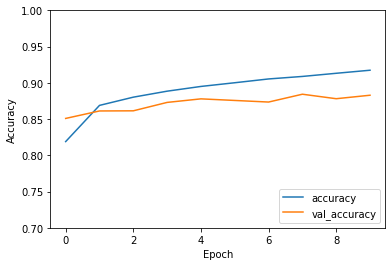

In [3]:
# Evaluamos nuestro modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_test,  label_test, verbose=2)
# accuracy es que tan pocos errores tuvo la red con las imágenes de entrenamiento, y val_accuracy es lo mismo para
# imágenes nuevas. Si existe una diferencia muy notoria entre estos valores, suele significar que se produjo 
# overfitting, es decir que la red memoriza los elementos de entrenamiento y es un riesgo de entrenar por muchas
# epochs.


In [4]:
model.save('epic_num_reader.model') #para guardar el modelo
# El siguiente error se debe a una un cambio en como funciona TensorFlow de la versión 1.0 a 2.0, no afecta
# el funcionamiento del modelo.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [5]:
model = tf.keras.models.load_model('epic_num_reader.model') #Para volver a cargarlo


In [6]:
predictions = model.predict(image_test) #Creamos predicciones para un batch de testeo

In [7]:
# Las predicciones son vectores de numeros entre 0 y 1, que representan la certeza de la red respecto a 
#la clasificación de la imagen.
print(predictions) 

[[9.61069672e-05 1.26548816e-08 9.40349366e-07 ... 3.30852647e-03
  1.06046386e-07 9.84695375e-01]
 [4.84210235e-04 1.43700801e-10 9.91094828e-01 ... 6.54697185e-10
  1.51725477e-08 5.84009022e-11]
 [2.74750546e-05 9.99970913e-01 8.09809775e-10 ... 5.03761144e-10
  2.68486255e-09 3.69638070e-10]
 ...
 [7.03814351e-07 7.61796806e-11 1.83809163e-06 ... 7.63391350e-10
  9.99993920e-01 1.47197914e-11]
 [2.43278663e-07 9.99998093e-01 6.15764817e-09 ... 1.01616171e-09
  2.94495912e-08 1.66883563e-09]
 [7.35703694e-08 6.17961815e-09 5.02994590e-06 ... 1.91028594e-05
  2.62741250e-05 1.43573928e-07]]


In [10]:
n = 9
print(np.argmax(predictions[n]))
#Imprimimos la clasificacion de maxima certeza para el elemento n

7


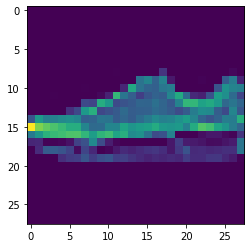

In [11]:
# Esta es la imagen asociada al elemento n
plt.imshow(image_test[9])
plt.show()

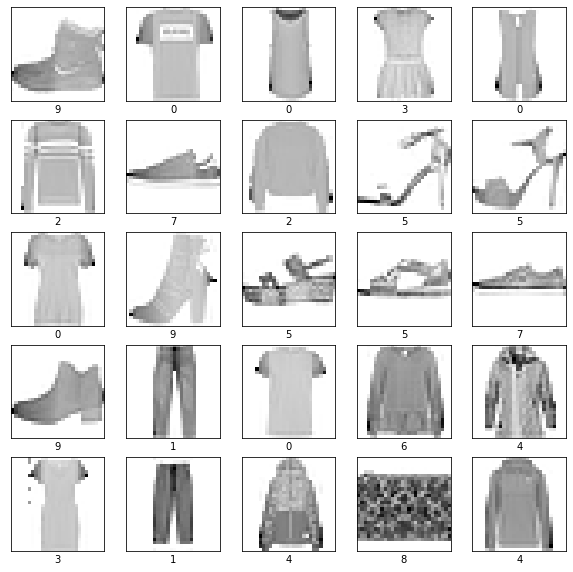

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_train[i])
plt.show()
#Acá se puede ver cual es la clasificación de las imagenes, para verificar si la predicción de la red fue correcta
# En el ejemplo utilizamos el elemento numero 9, que tiene un valor de 7. 
# Podemos ver en esta tabla que 7 representa a las zapatillas. 